<a href="https://colab.research.google.com/github/pdivya-mca/pdivya-mca-Assignment5_6_7_ML-Algorithm/blob/main/Assignment5_6_7_ML_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model


# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [ ]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


In [ ]:
df.shape

(15, 2)

**Cleaning Data**

In [ ]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [ ]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

**Find the linear regression equation for this data.**

In [ ]:
#creating a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X=df['Ground Temperature'].values.reshape(-1,1)
y=df['Chirps/Second'].values.reshape(-1,1)
model=LinearRegression()
model.fit(X,y)
print("Intercept:{} ,Coefficients:{}".format(model.intercept_, model.coef_))



Intercept:[0.45931465] ,Coefficients:[[0.20299973]]


In [ ]:
eq = "y = {}*x  + {}".format(model.coef_[0],model.intercept_)
print("The linear equation for the data is \n",eq)

The linear equation for the data is 
 y = [0.20299973]*x  + [0.45931465]


**Chart the original data and the equation on the chart.**

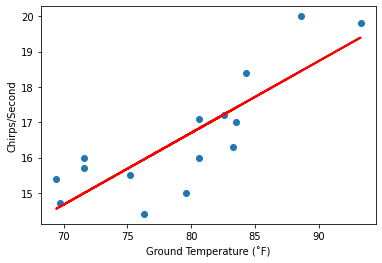

In [ ]:
plt.scatter(X,y)
plt.plot(X,model.predict(X),color="red",linewidth=2)
plt.xlabel("Ground Temperature (˚F)")
plt.ylabel("Chirps/Second")
plt.show()

**Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [ ]:
model.score(X,y)

0.6922946529146998

**Extrapolate data: If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?**

In [ ]:
model.predict([[95]])

array([[19.74428913]])

**Interpolate data: With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second. What was the approximate ground temperature that morning?**

In [ ]:
#x=(y-c)/m   c -> intercept , m -> Coefficients
temperature = (18 - 0.45931465)/0.20299973 
temperature

86.40743192121488

**Conclusion:**
In this dataset we can tell there isa positivecorrelation between ground temperature and chrip frequency. R2 score is 0.69 only so it is not strongly correlated. 

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
df = pd.read_fwf("brain_body.txt")

In [ ]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [ ]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dtypes

Brain    float64
Body     float64
dtype: object

**Find the linear regression equation for this data for brain weight to body weight.**

In [ ]:
#creating a linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X=df['Brain'].values.reshape(-1,1)
y=df['Body'].values.reshape(-1,1)
model=LinearRegression()
model.fit(X,y)
print("Intercept:{} ,Coefficients:{}".format(model.intercept_, model.coef_))


Intercept:[91.00439621] ,Coefficients:[[0.96649637]]


In [ ]:
eq = "y = {}*x  + {}".format(model.coef_[0],model.intercept_)
print("The linear equation for the data is \n",eq)

The linear equation for the data is 
 y = [0.96649637]*x  + [91.00439621]


**Chart the original data and the equation on the chart.**

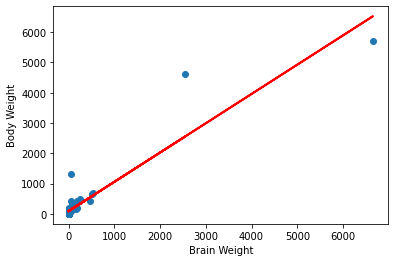

In [ ]:
plt.scatter(X,y)
plt.plot(X,model.predict(X),color="red",linewidth=2)
plt.xlabel("Brain Weight")
plt.ylabel("Body Weight")
plt.show()

**Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)**

In [ ]:
#R2 Score
model.score(X,y)

0.8726620843043331

**Conclusion :** The plot shows that the brain weight and body weight ares strongly correlated because r2 score is 0.87 so this equation is a good fit for linear regresssion and the dataset.

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [ ]:
df.shape

(52, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.6 KB


In [ ]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


## **Find the linear regression equation for this data using columns 1-5 to column 6.**

In [ ]:
input_cols = ['Sex','Rank','Year','Degree','YSdeg']
output_col = 'Salary'

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
X=df.iloc[:,:5]
y=df.iloc[:,5]
model=LinearRegression()
model.fit(X,y)
print("Intercept : {} , Coefficient : {}".format(model.intercept_,model.coef_))


Intercept : 11410.14654725559 , Coefficient : [ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354]


In [ ]:
#Linear Equation
equation = "Salary = {} * {} + {} * {} + {} * {} + {} * {} + {} * {} + {}".format(input_cols[0],model.coef_[0],input_cols[1],model.coef_[1],input_cols[2],model.coef_[2],input_cols[3],model.coef_[3],input_cols[4],model.coef_[4],model.intercept_)
print("The linear equation is \n",equation)

The linear equation is 
 Salary = Sex * 1241.792499601427 + Rank * 5586.1814495214385 + Year * 482.85976782882153 + Degree * -1331.6440634059095 + YSdeg * -128.79057354486122 + 11410.14654725559


In [ ]:
print(model.score(X,y))

0.8547180674410969


## **Find the selection of columns with the best  R2  score.**

In [ ]:
import itertools as it
def input_combos(cols):
    return [it.combinations(cols, n+1) for n in range(len(cols))]

In [ ]:
combos = input_combos(input_cols)

In [ ]:
def combo_r2scores( all_combos, df, output='Salary'):
    combo_scores = {}
    for i in range(len(list(all_combos))):
        for j in list(all_combos[i]):
            X = df[list(j)]
            Y = df['Salary']
            model = LinearRegression().fit(X,Y)
            combo_scores[model.score(X,Y)] = j
    return combo_scores

In [ ]:
combo_r2scores(combos,df,'Salary')

{0.06389892583288004: ('Sex',),
 0.7525360539274633: ('Rank',),
 0.49093702676921624: ('Year',),
 0.004861680984748373: ('Degree',),
 0.45542813458360276: ('YSdeg',),
 0.7554917749443394: ('Sex', 'Rank'),
 0.4911360941886388: ('Sex', 'Year'),
 0.06643739842018881: ('Sex', 'Degree'),
 0.4930479271966782: ('Sex', 'YSdeg'),
 0.8436480933264597: ('Rank', 'Year'),
 0.7557961688386643: ('Rank', 'Degree'),
 0.7623948189698249: ('Rank', 'YSdeg'),
 0.4919014149016441: ('Year', 'Degree'),
 0.5782019226431887: ('Year', 'YSdeg'),
 0.5409662288237875: ('Degree', 'YSdeg'),
 0.8454319861987166: ('Sex', 'Rank', 'Year'),
 0.7583144768153613: ('Sex', 'Rank', 'Degree'),
 0.7666122610227071: ('Sex', 'Rank', 'YSdeg'),
 0.49207944757472966: ('Sex', 'Year', 'Degree'),
 0.5808063918180405: ('Sex', 'Year', 'YSdeg'),
 0.5832708257660315: ('Sex', 'Degree', 'YSdeg'),
 0.8437395200874137: ('Rank', 'Year', 'Degree'),
 0.8456725764485596: ('Rank', 'Year', 'YSdeg'),
 0.7625149185326454: ('Rank', 'Degree', 'YSdeg'),
 

Combination of all input columns gives the maximum r2 score.  Rank and Year comination gives the maximum r2 score of 0.8 from the above result. 

## **Report whether sex is a factor in salary.**

[Text(0.5, 1.0, ' Salary Vs Sex with change in Rank')]

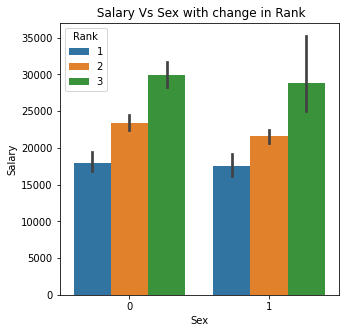

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 5))
sns.barplot(x='Sex', y='Salary', hue='Rank', data=df).set(title= ' Salary Vs Sex with change in Rank')

[Text(0.5, 1.0, 'Salary Vs Sex with change in Degree')]

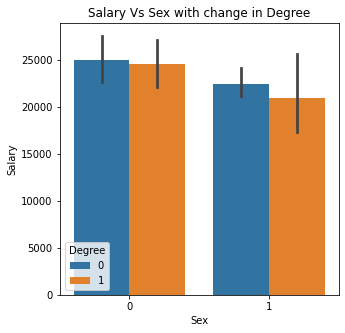

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(x='Sex', y='Salary', hue='Degree', data=df).set(title= 'Salary Vs Sex with change in Degree')

In [ ]:
nums= df.Sex.value_counts()
print('Num men: {}\nNum women: {}'.format(nums[0], nums[1]))

Num men: 38
Num women: 14


### **Conclusion: Sex is not a factor in salary.**